In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import cifar10


2024-03-16 08:00:26.313867: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 08:00:26.313926: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 08:00:26.315495: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Preprocess CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [3]:
class Diagonal_BiLSTM(Model):
    def __init__(self):
        super(Diagonal_BiLSTM, self).__init__()
        self.reshape = layers.Reshape((32 * 32, 3))  
        self.bidirectional = layers.Bidirectional(layers.LSTM(256, return_sequences=True))
        self.dropout = layers.Dropout(0.5)
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(512, activation='relu')
        self.dense2 = layers.Dense(32 * 32 * 3, activation='sigmoid')

    def call(self, inputs):
        x = self.reshape(inputs)
        x = self.bidirectional(x)
        x = self.dropout(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return tf.reshape(x, [-1, 32, 32, 3])

In [4]:
model = Diagonal_BiLSTM()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(x_train, x_train, batch_size=64, epochs=5, validation_split=0.2)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 316ms/step - accuracy: 0.5660 - loss: 0.0276 - val_accuracy: 0.7056 - val_loss: 0.0085
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 314ms/step - accuracy: 0.7135 - loss: 0.0079 - val_accuracy: 0.7288 - val_loss: 0.0064
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 313ms/step - accuracy: 0.7360 - loss: 0.0061 - val_accuracy: 0.7426 - val_loss: 0.0056
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 313ms/step - accuracy: 0.7483 - loss: 0.0054 - val_accuracy: 0.7532 - val_loss: 0.0050
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 313ms/step - accuracy: 0.7575 - loss: 0.0048 - val_accuracy: 0.7743 - val_loss: 0.0043


In [5]:
generated_images = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step


In [6]:
generated_images = np.clip(generated_images, 0, 1)


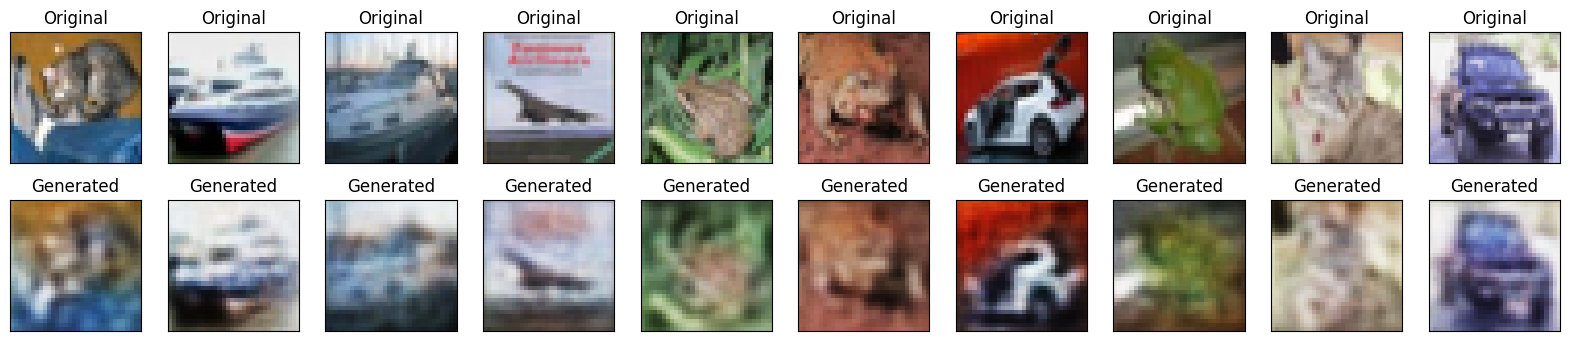

In [7]:
import matplotlib.pyplot as plt

# Display the generated images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(generated_images[i])
    plt.title("Generated")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [8]:
import numpy as np

def calculate_log_likelihood(images, model):
    # Predict probabilities for all images at once
    probabilities = model.predict(images)

    # Calculate log likelihoods for all images at once
    log_likelihoods = -np.mean(np.log(probabilities), axis=(1, 2, 3))
    
    # Return the mean log likelihood
    return np.mean(log_likelihoods)

# Calculate log likelihood for generated images
log_likelihood = calculate_log_likelihood(generated_images, model)
print("Log Likelihood:", log_likelihood)


313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step
Log Likelihood: 0.90011054
